<a href="https://colab.research.google.com/github/crislanecas/estudos_python/blob/main/Alura%26OracleNextEducation/08_Introdu%C3%A7%C3%A3o_Machine_Learning_Otimiza%C3%A7%C3%A3o_com_Hiperpar%C3%A2metros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importa a biblioteca Pandas.
import pandas as pd

# Importando os dados

In [ ]:
# Importa os dados que estão na URL.
uri = "https://gist.githubusercontent.com/guilhermesilveira/e99a526b2e7ccc6c3b70f53db43a87d2/raw/1605fc74aa778066bf2e6695e24d53cf65f2f447/machine-learning-carros-simulacao.csv"
dados = pd.read_csv(uri).drop(columns=["Unnamed: 0"], axis=1) # Apaga a coluna Unnamed, pois não será usada.
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


# Ordenando os dados

In [ ]:
# Ordena a base pela coluna vendido de forma ascendente, primeiro os veículos que não foram vendidos, e depois os que foram vendidos.
# Gerando assim uma base muito ruim de "azar", por não ajudar no treinamento do modelo.
dados_azar = dados.sort_values("vendido", ascending=True)
x_azar = dados_azar[["preco", "idade_do_modelo","km_por_ano"]]
y_azar = dados_azar["vendido"]
dados_azar.head()

,preco,vendido,idade_do_modelo,km_por_ano
4999,74023.29,0,12,24812.80412
5322,84843.49,0,13,23095.63834
5319,83100.27,0,19,36240.72746
5316,87932.13,0,16,32249.56426
5315,77937.01,0,15,28414.50704


In [ ]:
# Importa a biblioteca Numpy.
import numpy as np
# Importar as ferramentas da biblioteca scikit-learn.
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate, GroupKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [ ]:
# Define o SEED para gerar números aleatórios, não tão aleatórios assim, e ter um teste replicável para todos os métodos.
SEED = 301
np.random.seed(SEED)

# Modelo DummyClassifier com cross-validation

In [ ]:
# Cria um modelo classificação que pode ser usado como baseline, por ser bastate simples.
modelo = DummyClassifier()

# Faz uma validação cruzada, treinando o algoritmo 10 vezes para termos uma estimativa de quão bem esse modelo funcionaria no mundo real.
results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=False)

# Calcula acurácia média e o intervalo considerando o desvio padrão.
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com dummy stratified, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com dummy stratified, 10 = [58.00, 58.00]


# Modelo DecisionTreeClassifier com cross-validation

In [ ]:
# Cria um modelo de classifiação de árvore de decisão.
modelo = DecisionTreeClassifier(max_depth=2)

# Faz uma validação cruzada, treinando o algoritmo 10 vezes.
results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=False)

# Calcula acurácia média e o intervalo considerando o desvio padrão.
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com cross validation, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, 10 = [73.83, 77.73]


# Adicionando um novo grupo de dados

In [ ]:
# Gera dados elatorios de modelo de carro para nova coluda modelo, uma variável categoria, na qual os elementos da amostra não possuem relação entre si .
# Simulação de agrupamento ao usar estimador.
np.random.seed(SEED)
dados['modelo'] = dados.idade_do_modelo + np.random.randint(-2, 3, size=10000)
dados.modelo = dados.modelo + abs(dados.modelo.min()) + 1
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo
0,30941.02,1,18,35085.22134,18
1,40557.96,1,20,12622.05362,24
2,89627.50,0,12,11440.79806,14
3,95276.14,0,3,43167.32682,6
4,117384.68,1,4,12770.11290,5


# Criando uma função para calcular os resultados

In [ ]:
# Cria uma função que recebe o resultado e calcula acurácia média e o intervalo considerando o desvio padrão.
def imprime_resultados(results):
  media = results['test_score'].mean() * 100
  desvio_padrao = results['test_score'].std() * 100
  print("Accuracy médio %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio_padrao, media + 2 * desvio_padrao))

# Modelo SVC (Support Vector Machine) com GroupKFold

In [ ]:
# Utiliza o StandardScaler() para reescalonar os dados para uma faixa similar.
scaler = StandardScaler()

# Utiliza a função SVC() para instanciar o modelo.
modelo = SVC()

# Cria um pipeline com os dados escalonados e modelo SVC.
pipeline = Pipeline([('transformacao', scaler), ('estimador', modelo)])

# Utiliza método GroupKFold que agrupa pelo modelo do carro, para analisar como o modelo se comporta com novo grupo.
cv = GroupKFold(n_splits = 10)

# Faz uma validação cruzada, treinando o algoritmo 10 vezes.
results = cross_validate(pipeline, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)

# Imprimi o resultado usando a função criada acima.
imprime_resultados(results)

Accuracy médio 76.68
Intervalo [74.28, 79.08]


# Modelo DecisionTreeClassifier com GroupKFold

In [ ]:
# Utiliza método GroupKFold que agrupa pelo modelo do carro, para analisar como o modelo se comporta com novo grupo.
cv = GroupKFold(n_splits = 10)

# Cria um modelo de classifiação de árvore de decisão.
modelo = DecisionTreeClassifier(max_depth=2)

# Faz uma validação cruzada, treinando o algoritmo 10 vezes.
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)

# Imprimi o resultado usando a função criada acima.
imprime_resultados(results)

Accuracy médio 75.78
Intervalo [73.67, 77.90]


In [ ]:
# Utiliza o método fit() para treinar o modelo com os dados passados como parâmetro.
modelo.fit(x_azar, y_azar)

DecisionTreeClassifier(max_depth=2)

## Análise gráfica do modelo

In [ ]:
# Importar a ferramenta para visualização gráfica da árvore da biblioteca scikit-learn.
from sklearn.tree import export_graphviz
import graphviz

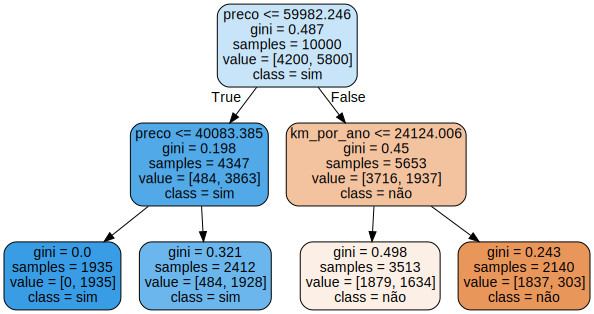

In [ ]:
# Define os parâmetros para visualização da árvore de decisão.
features = x_azar.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True,
                class_names=["não", "sim"],
                feature_names = features)

graph = graphviz.Source(dot_data)
graph

## Explorando hiperprarâmetros em 1 dimensão

In [ ]:
# Cria uma função para executar a árvore de decisão para uma profundidade específica e exibe o resultado da média da acurácia.
def roda_arvore_de_decisao(max_depth):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
  print("max_depth = %d, media =%.2f" % (max_depth, results['test_score'].mean() * 100))

for i in range (1, 33):
      roda_arvore_de_decisao(i)

max_depth = 1, media =75.78
max_depth = 2, media =75.78
max_depth = 3, media =78.67
max_depth = 4, media =78.63
max_depth = 5, media =78.56
max_depth = 6, media =78.12
max_depth = 7, media =77.96
max_depth = 8, media =77.86
max_depth = 9, media =77.38
max_depth = 10, media =77.19
max_depth = 11, media =76.97
max_depth = 12, media =76.49
max_depth = 13, media =75.81
max_depth = 14, media =75.66
max_depth = 15, media =75.16
max_depth = 16, media =75.11
max_depth = 17, media =74.74
max_depth = 18, media =74.33
max_depth = 19, media =74.34
max_depth = 20, media =74.22
max_depth = 21, media =73.80
max_depth = 22, media =73.81
max_depth = 23, media =73.38
max_depth = 24, media =73.43
max_depth = 25, media =73.14
max_depth = 26, media =73.04
max_depth = 27, media =72.91
max_depth = 28, media =72.66
max_depth = 29, media =72.73
max_depth = 30, media =72.81
max_depth = 31, media =72.86
max_depth = 32, media =72.52


Conclusão: O que esperaríamos é que, quanto maior fosse a profundidade da árvore, mais decisões ela precisaria tomar e mais perfeito seria o seu treinamento em relação aos nossos testes. Porém, a partir de max_depth=3, que possui uma média 78.67, temos uma queda constante até max_depth = 32, que possui a média mais baixa, 72.52.

Isso acontece porque, quando treinamos a nossa árvore, ela aprende e cria as suas ramificações. Com profundidades muito grandes, a árvore se torna tão perfeita para os dados de treino que falha nos dados de teste - quase como se ela tivesse memorizado o teste.

In [ ]:
# Cria uma função para executar a árvore de decisão para uma profundidade específica e exibe o resultado da média da acurácia dos dados de trieno e teste.
def roda_arvore_de_decisao(max_depth):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  print("Arvore max_depth = %d, treino = %.2f, teste = %.2f," % (max_depth, results['train_score'].mean() * 100, results['test_score'].mean() * 100))

for i in range (1, 33):
      roda_arvore_de_decisao(i)


Arvore max_depth = 1, treino = 75.79, teste = 75.78,
Arvore max_depth = 2, treino = 75.79, teste = 75.78,
Arvore max_depth = 3, treino = 78.75, teste = 78.67,
Arvore max_depth = 4, treino = 78.79, teste = 78.63,
Arvore max_depth = 5, treino = 78.94, teste = 78.56,
Arvore max_depth = 6, treino = 79.17, teste = 78.12,
Arvore max_depth = 7, treino = 79.50, teste = 77.96,
Arvore max_depth = 8, treino = 79.89, teste = 77.86,
Arvore max_depth = 9, treino = 80.46, teste = 77.38,
Arvore max_depth = 10, treino = 81.16, teste = 77.19,
Arvore max_depth = 11, treino = 82.03, teste = 76.97,
Arvore max_depth = 12, treino = 82.89, teste = 76.49,
Arvore max_depth = 13, treino = 83.95, teste = 75.81,
Arvore max_depth = 14, treino = 85.03, teste = 75.66,
Arvore max_depth = 15, treino = 86.14, teste = 75.16,
Arvore max_depth = 16, treino = 87.19, teste = 75.11,
Arvore max_depth = 17, treino = 88.31, teste = 74.74,
Arvore max_depth = 18, treino = 89.26, teste = 74.33,
Arvore max_depth = 19, treino = 90.32

Conclusão: os resultados de treinos são cada vez melhores, mas os de teste cairam rapidamente.

### Melhorando a visualização dos resultados

In [ ]:
# Cria uma função para executar a árvore de decisão para uma profundidade específica e exibe o resultado em uma dataframe.
from sklearn.model_selection import GroupKFold

def roda_arvore_de_decisao(max_depth):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100
  print("Arvore max_depth = %d, treino = %.2f, teste = %.2f" % (max_depth, results['train_score'].mean() * 100, results['test_score'].mean() * 100))
  tabela = [max_depth, train_score, test_score]
  return tabela

resultados = [roda_arvore_de_decisao(i) for i in range (1, 33)]
resultados = pd.DataFrame(resultados, columns = ["max_depth", "train", "test"])
resultados.head()

Arvore max_depth = 1, treino = 75.79, teste = 75.78
Arvore max_depth = 2, treino = 75.79, teste = 75.78
Arvore max_depth = 3, treino = 78.75, teste = 78.67
Arvore max_depth = 4, treino = 78.79, teste = 78.63
Arvore max_depth = 5, treino = 78.94, teste = 78.56
Arvore max_depth = 6, treino = 79.17, teste = 78.12
Arvore max_depth = 7, treino = 79.50, teste = 77.96
Arvore max_depth = 8, treino = 79.89, teste = 77.86
Arvore max_depth = 9, treino = 80.46, teste = 77.38
Arvore max_depth = 10, treino = 81.16, teste = 77.19
Arvore max_depth = 11, treino = 82.03, teste = 76.97
Arvore max_depth = 12, treino = 82.89, teste = 76.49
Arvore max_depth = 13, treino = 83.95, teste = 75.81
Arvore max_depth = 14, treino = 85.03, teste = 75.66
Arvore max_depth = 15, treino = 86.14, teste = 75.16
Arvore max_depth = 16, treino = 87.19, teste = 75.11
Arvore max_depth = 17, treino = 88.31, teste = 74.74
Arvore max_depth = 18, treino = 89.26, teste = 74.33
Arvore max_depth = 19, treino = 90.32, teste = 74.34
Ar

,max_depth,train,test
0,1,75.791169,75.784219
1,2,75.791169,75.784219
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912


In [ ]:
# Importa as bibliotecas.
import seaborn as sns
import matplotlib.pyplot as plt

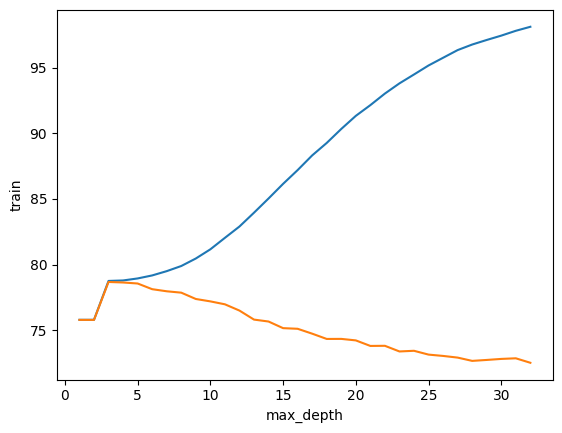

In [ ]:
# Cria uma gráfico de linha para os resultados de acurácia média de treino e teste.
sns.lineplot(x = "max_depth", y = "train", data = resultados)
ax = sns.lineplot(x = "max_depth", y = "test", data = resultados)
# plt.legend(["Treino", "Teste"])

Conclusão: podemos analisar que conforme aumentamos o max_depth, a média do treino vai ficando cada vez melhor, chegando a quase 100%. Porém, em determinado momento, o algoritmo começa a ficar tão exato para o modelo que deixa de ser adequado para os testes, com a média sendo cada vez menor.

Esse tipo de cenário é chamado de overfitting.

In [ ]:
# Ordena os resultados a partir dos melhores resultados dod testes.
resultados.sort_values("test", ascending=False).head()

,max_depth,train,test
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912
5,6,79.170115,78.123266
6,7,79.496806,77.963185


## Explorando hiperprarâmetros em 2 dimensão

### Teste 1

In [ ]:
# Cria uma função para executar a árvore de decisão.
# Define como parâmetro uma profundidade (max_depth) e quantidade mínima de amostra para um nó da folha (min_samples_leaf) específica de 1 a 32.
def roda_arvore_de_decisao(max_depth, min_samples_leaf):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf = min_samples_leaf)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100
  # print("Arvore max_depth = %d, min_samples_leaf = %d, treino = %.2f, teste = %.2f" % (max_depth, min_samples_leaf, train_score, test_score))
  tabela = [max_depth, min_samples_leaf, train_score, test_score]
  return tabela

def busca():
  resultados = []
  for max_depth in range(1,33):
    for min_samples_leaf in range(1,33):
        tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
        resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns= ["max_depth","min_samples_leaf","train","test"])
  return resultados

resultados = busca()
resultados.head()

,max_depth,min_samples_leaf,train,test
0,1,1,75.791169,75.784219
1,1,2,75.791169,75.784219
2,1,3,75.791169,75.784219
3,1,4,75.791169,75.784219
4,1,5,75.791169,75.784219


### Teste 2 (otimizado)

In [ ]:
# Cria uma função para executar a árvore de decisão.
# Define como parâmetro uma profundidade (max_depth) de 1 a 32 e quantidade mínima de amostra para um nó da folha (min_samples_leaf) específicadas em 32, 64, 128, 256.
def roda_arvore_de_decisao(max_depth, min_samples_leaf):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf = min_samples_leaf)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100
  # print("Arvore max_depth = %d, min_samples_leaf = %d, treino = %.2f, teste = %.2f" % (max_depth, min_samples_leaf, train_score, test_score))
  tabela = [max_depth, min_samples_leaf, train_score, test_score]
  return tabela

def busca():
  resultados = []
  for max_depth in range(1,33):
    for min_samples_leaf in [32, 64, 128, 256]:
        tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
        resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns= ["max_depth","min_samples_leaf","train","test"])
  return resultados

resultados = busca()
resultados.head()

,max_depth,min_samples_leaf,train,test
0,1,32,75.791169,75.784219
1,1,64,75.791169,75.784219
2,1,128,75.791169,75.784219
3,1,256,75.791169,75.784219
4,2,32,75.791169,75.784219


#### Análise dos resultados

In [ ]:
# Ordena os resultados a partir dos melhores resultados dod testes.
resultados.sort_values("test", ascending=False).head()

,max_depth,min_samples_leaf,train,test
15,4,256,78.750993,78.672633
12,4,32,78.750993,78.672633
14,4,128,78.750993,78.672633
13,4,64,78.750993,78.672633
8,3,32,78.750993,78.672633


In [ ]:
# Cria uma matriz de correlação com os resultados da exploração dos hiperparâmetros.
corr = resultados.corr()
corr

,max_depth,min_samples_leaf,train,test
max_depth,1.000000e+00,-2.780775e-16,0.536705,-0.027675
min_samples_leaf,-2.780775e-16,1.000000e+00,-0.409676,0.349011
train,5.367048e-01,-4.096762e-01,1.000000,0.116466
test,-2.767507e-02,3.490111e-01,0.116466,1.000000


#### Análise gráfica

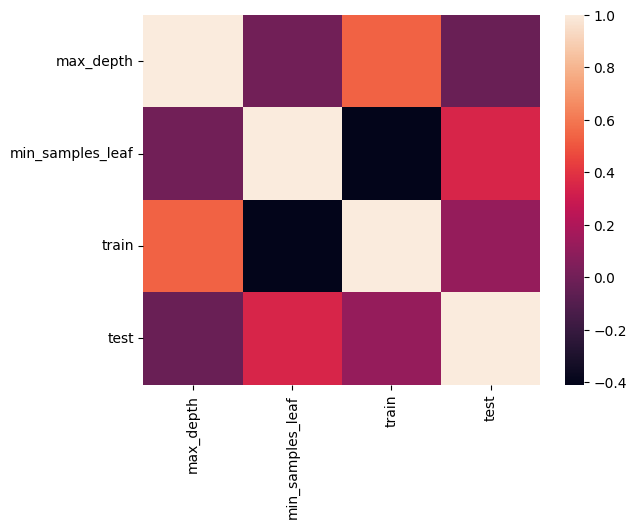

In [ ]:
# Cria um mapa de calor com a matriz de correlação com os resultados da exploração dos hiperparâmetros.
sns.heatmap(corr)
plt.show() # Oculta texto na parte superior do gráfico.

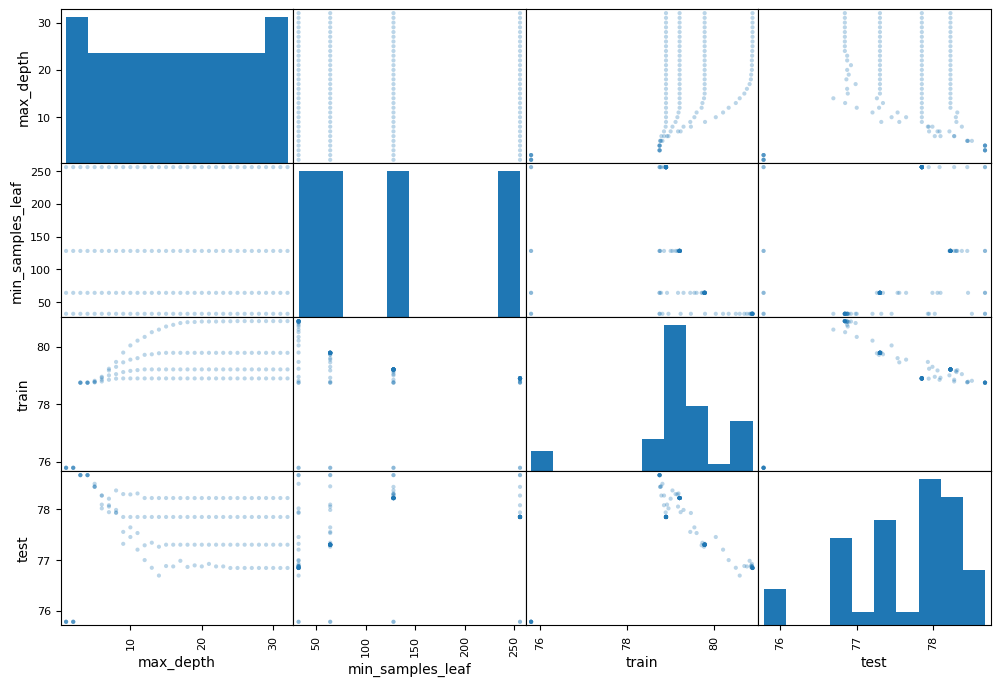

In [ ]:
# Cria uma matriz com gráficos de dispersão
pd.plotting.scatter_matrix(resultados, figsize = (12, 8), alpha = 0.3)
plt.show() # Oculta texto na parte superior do gráfico.

Conclusão: Na diagonal, são exibidos os histogramas dos valores. Por exemplo, para train, tivemos diversos resultados na faixa de 79%, e no test tivemos diversos valores na faixa de 78%.

Já os gráficos que não compõem a diagonal são equivalentes à nossa correlação - à medida em que max_depth aumenta, o resultado de test cai e o resultado de train sobe, entre outras correlações.

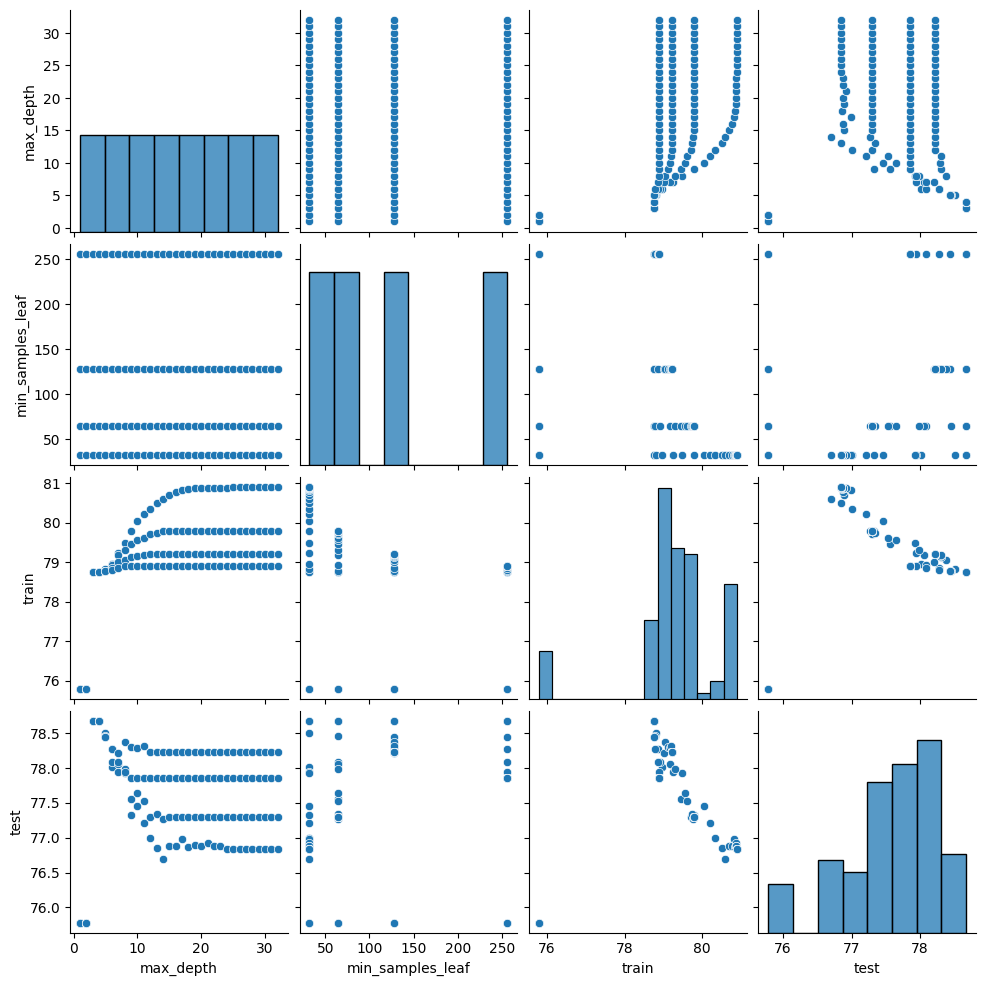

In [ ]:
# Cria um gráfico de dispersão relacionando todas as variáveis do resultado em par.
sns.pairplot(resultados)
plt.show() # Oculta texto na parte superior do gráfico.

In [ ]:
# Importa a biblioteca string para criação do gráfico abaixo.
from string import ascii_letters

<ipython-input-32-e11ebcf37035>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<Axes: >

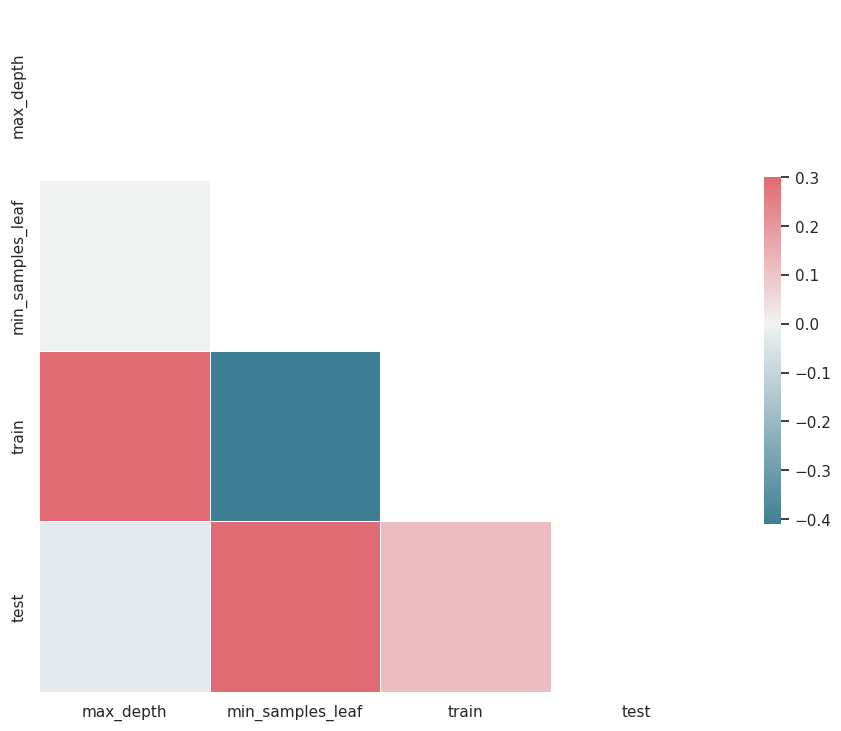

In [ ]:
# Define o estilo do gráfico.
sns.set(style="white")

# Gera uma máscara para ocultar o triângulo superior.
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Configura a figura matplotlib.
f, ax = plt.subplots(figsize=(11, 9))

# Gera um mapa de cores.
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Cria um mapa de calor com a máscara e a proporção correta.
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Conclusão: nesta matriz somente os dados que não são equivalentes são plotados. Percebemos que parece existir uma correlação muito forte entre test e min_samples_leaf (quanto maior o min_samples_leaf, maior a qualidade do test).

### Teste 3

In [ ]:
# Cria uma função para executar a árvore de decisão.
# Define como parâmetro max_depth de 1 a 32 e min_samples_leaf específicadas em 128, 192, 256, 512.
def busca():
  resultados = []
  for max_depth in range(1,33):
    for min_samples_leaf in [128, 192, 256, 512]:
        tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
        resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns= ["max_depth","min_samples_leaf","train","test"])
  return resultados

resultados = busca()
resultados.head()

,max_depth,min_samples_leaf,train,test
0,1,128,75.791169,75.784219
1,1,192,75.791169,75.784219
2,1,256,75.791169,75.784219
3,1,512,75.791169,75.784219
4,2,128,75.791169,75.784219


In [ ]:
# Ordena os resultados a partir dos melhores resultados dod testes.
resultados.sort_values("test", ascending=False).head()

,max_depth,min_samples_leaf,train,test
13,4,192,78.750993,78.672633
8,3,128,78.750993,78.672633
9,3,192,78.750993,78.672633
10,3,256,78.750993,78.672633
14,4,256,78.750993,78.672633


## Explorando hiperprarâmetros em 3 dimensão

### Teste 1

In [ ]:
# Cria uma função para executar a árvore de decisão com max_depth de 1 a 32, min_samples_leaf específicado em 32, 64, 128, 256.
# Incluir mais um parâmetro, o min_samples_split, número mínimo de amostras necessárias para dividir um nó interno, específicado em 32, 64, 128, 256.
def roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf = min_samples_leaf, min_samples_split = min_samples_split)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100

  tabela = [max_depth, min_samples_leaf, min_samples_split, train_score, test_score]
  return tabela

def busca():
  resultados = []
  for max_depth in range(1,33):
    for min_samples_leaf in [32, 64, 128, 256]:
        for min_samples_split in [32, 64, 128, 256]:
          tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split)
          resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns= ["max_depth","min_samples_leaf", "min_samples_split", "train","test"])
  return resultados

resultados = busca()
resultados.head()

,max_depth,min_samples_leaf,min_samples_split,train,test
0,1,32,32,75.791169,75.784219
1,1,32,64,75.791169,75.784219
2,1,32,128,75.791169,75.784219
3,1,32,256,75.791169,75.784219
4,1,64,32,75.791169,75.784219


### Adicionando métricas para análise de desempenho

In [ ]:
# Cria uma função para executar a árvore de decisão com max_depth de 1 a 32, min_samples_leaf específicado em 32, 64, 128, 256.
# Incluir mais um parâmetro, o min_samples_split, número mínimo de amostras necessárias para dividir um nó interno, específicado em 32, 64, 128, 256.
def roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf = min_samples_leaf, min_samples_split = min_samples_split)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  # Calcula a métrica de performance de tempo de execução.
  fit_time = results['fit_time'].mean()
  score_time = results['score_time'].mean()
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100

  tabela = [max_depth, min_samples_leaf, min_samples_split, train_score, test_score, fit_time, score_time]
  return tabela

def busca():
  resultados = []
  for max_depth in range(1,33):
    for min_samples_leaf in [32, 64, 128, 256]:
        for min_samples_split in [32, 64, 128, 256]:
          tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split)
          resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns= ["max_depth","min_samples_leaf", "min_samples_split", "train","test", "fit_time", "score_time"])
  return resultados

resultados = busca()
resultados.head()

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
0,1,32,32,75.791169,75.784219,0.006044,0.001958
1,1,32,64,75.791169,75.784219,0.005878,0.001984
2,1,32,128,75.791169,75.784219,0.006095,0.001969
3,1,32,256,75.791169,75.784219,0.006458,0.002138
4,1,64,32,75.791169,75.784219,0.005883,0.001935


## Explorando hiperparâmetros com GridSearchCV (Grid Search Cross Validation)

In [ ]:
# Importar a ferramenta de busca de hiperparâmetros da biblioteca scikit-learn.
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define o SEED para gerar números e ter um teste replicável para todos os métodos.
SEED=301
np.random.seed(SEED)

# Defini os parâmentros que serão utilizados.
espaco_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "criterion": ["gini", "entropy"]
}

# O GridSearchCV() funciona como um modelo, que irá rodar o cross validation.
busca = GridSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros,
                    cv = GroupKFold(n_splits = 10))

# Utiliza o método fit() para treinar o modelo.
busca.fit(x_azar, y_azar, groups = dados.modelo)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011973,0.002075,0.002401,0.000501,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
1,0.011362,0.000742,0.002153,0.000112,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
2,0.011403,0.000769,0.002219,0.000073,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
3,0.011190,0.000360,0.002464,0.000808,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
4,0.011169,0.000770,0.002108,0.000164,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1


In [ ]:
# Exibe os melhores parâmetros e score.
print(busca.best_params_)
print(busca.best_score_ * 100)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 32, 'min_samples_split': 32}
78.67263337284332


In [ ]:
# Mostra a melhor estimador e atribui o valor a variável 'melhor'.
melhor = busca.best_estimator_
melhor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

## Fazendo previsões com o melhor estimador

### Predict()
Utilizar o predict() acaba sendo muito otimista, pois acabamos incorrendo em um vício sobre os dados. Portanto, essa abordagem deve ser evitada.

In [ ]:
# Importar a ferramenta para calculo da accuracy (taxa de acerto) da biblioteca scikit-learn.
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
# Cria a previsão utilizando o método predict().
predicoes = melhor.predict(x_azar)

# Calcula a acurária da previsão.
accuracy = accuracy_score(predicoes, y_azar) * 100
print("Accuracy para os dados foi %.2f%%" % accuracy)

Accuracy para os dados foi 78.75%


### GroupKFold()
Como o Pandas não suporta nested validation com o GroupKFold, não conseguiremos prever o resultado para novos grupos. Como alternativa, usaremos o KFold comum.

https://github.com/scikit-learn/scikit-learn/issues/7646

In [ ]:
# Calcula as métricas do teste.
# scores = cross_val_score(busca, x_azar, y_azar, cv = GroupKFold(n_splits=10), groups = dados.modelo)

### KFold()

In [ ]:
# Define o SEED para gerar números e ter um teste replicável para todos os métodos.
SEED=301
np.random.seed(SEED)

# Defini os parâmentros que serão utilizados.
espaco_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "criterion": ["gini", "entropy"]
}

# O GridSearchCV() funciona como um modelo, que irá rodar o cross validation.
busca = GridSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros,
                    cv = KFold(n_splits = 5, shuffle=True))

# Utiliza o método fit() para treinar o modelo.
busca.fit(x_azar, y_azar)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012989,0.006115,0.002249,0.000703,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
1,0.009676,0.000108,0.002051,0.000099,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
2,0.009959,0.000160,0.002224,0.000135,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
3,0.009864,0.000078,0.002155,0.000061,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
4,0.009835,0.000088,0.002002,0.000053,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1


In [ ]:
# Calcula as métricas do teste.
scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=5, shuffle=True))
scores

array([0.7895, 0.7825, 0.7905, 0.7715, 0.7995])

In [ ]:
# Cria uma função para imprimir as métricas do teste.
def imprime_score(scores):
  media = scores.mean() * 100
  desvio = scores.std() * 100
  print("Accuracy médio %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

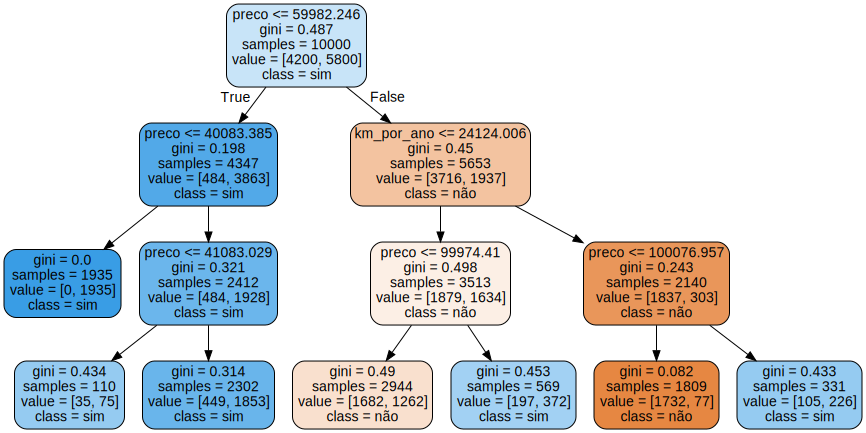

In [ ]:
# Define os parâmetros para visualização da árvore de decisão.
features = x_azar.columns
dot_data = export_graphviz(melhor, out_file=None, filled=True, rounded=True,
                          class_names=["não","sim"],
                          feature_names=features)
graph = graphviz.Source(dot_data)
graph